# 集成学习

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mlp
import seaborn as sns
import re, pip, conda

In [2]:
for package in [sklearn,mlp,np,pd,sns,pip,conda]:
    print(re.findall("([^']*)",str(package))[2],package.__version__)

sklearn 1.0.1
matplotlib 3.4.3
numpy 1.20.3
pandas 1.3.4
seaborn 0.11.2
pip 21.3.1
conda 4.10.3


In [3]:
#pip install --upgrade scikit-learn
#conda update scikit-learn

**目录**

一 集成学习的三大关键领域<br>
二 Bagging方法的基本思想<br>
三 随机森林RandomForest<br>
&emsp; 1 RamdomForestRegressor的实现<br>
&emsp; 2 随机森林回归器的参数<br>
&emsp;&emsp; 2.1 弱分类器结构<br>
&emsp;&emsp; 2.2 弱分类器数量<br>
&emsp;&emsp; 2.3 弱分类器训练的数据<br>
&emsp;&emsp; 2.4 其他参数<br>
四 增量学习：随机森林处理巨量数据<br>
&emsp; 1 普通学习vs增量学习<br>
&emsp; 2 增量学习在Kaggle数据上的应用<br>
五 原理进阶：Bagging方法6大面试热点问题<br>
六 随机森林的参数空间与自动优化

# 一 集成学习的三大关键领域

集成学习（Ensemble learning）是机器学习中最先进、最有效、最具研究价值的领域之一，这类方法会训练多个弱评估器（base estimators）、并将它们输出的结果以某种方式结合起来解决一个问题。

在过去十年中，人工智能相关产业蓬勃发展，计算机视觉、自然语言处理、语音识别等领域不断推陈出新、硕果累累，但热闹是深度学习的，机器学习好似什么也没有。2012年之后，传统机器学习占据的搜索、推荐、翻译、各类预测领域都被深度学习替代或入侵，在招聘岗位中，69%的岗位明确要求深度学习技能，传统机器学习算法在这一场轰轰烈烈的人工智能热潮当中似乎有些被冷落了。

在人工智能大热的背后，集成学习就如同裂缝中的一道阳光，凭借其先进的思想、优异的性能杀出了一条血路，成为当代机器学习领域中最受学术界和产业界青睐的领域。

从今天的眼光来看，集成学习是：

- **当代工业应用中，唯一能与深度学习算法分庭抗礼的算法**<br><br>
- **数据竞赛高分榜统治者，KDDcup、Kaggle、天池、DC冠军队御用算法**<br><br>
- **在搜索、推荐、广告等众多领域，事实上的工业标准和基准模型**<br><br>
- **任何机器学习/深度学习工作者都必须掌握其原理、熟读其思想的领域**<br>

在集成学习的发展历程中，集成的思想以及方法启发了众多深度学习和机器学习方面的工作，在学术界和工业界都取得了巨大的成功。今天，集成学习可以被分为三个主要研究领域：

- **模型融合**<br>
    模型融合在最初的时候被称为“分类器结合”，这个领域主要关注强评估器，试图设计出强大的规则来融合强分类器的结果、以获取更好的融合结果。这个领域的手段主要包括了投票法Voting、堆叠法Stacking、混合法Blending等，且被融合的模型需要是强分类器。*模型融合技巧是机器学习/深度学习竞赛中最为可靠的提分手段之一，常言道：当你做了一切尝试都无效，试试模型融合。*<br><br>
- **弱分类器集成**<br>
    弱分类器集成主要专注于对传统机器学习算法的集成，这个领域覆盖了大部分我们熟悉的集成算法和集成手段，如装袋法bagging，提升法boosting。这个领域试图设计强大的集成算法、来将多个弱学习器提升成为强学习器。<br><br>
- **混合专家模型**（mixture of experts）<br>
    混合专家模型常常出现在深度学习（神经网络）的领域。在其他集成领域当中，不同的学习器是针对同一任务、甚至在同一数据上进行训练，但在混合专家模型中，我们将一个复杂的任务拆解成几个相对简单且更小的子任务，然后针对不同的子任务训练个体学习器（专家），然后再结合这些个体学习器的结果得出最终的输出。

在课程当中，我们将对弱分类器集成与模型融合两部分进行详细的说明，混合专家模型我们将会在案例中有专门的讲解。

# 二 Bagging方法的基本思想

Bagging又称为“装袋法”，它是所有集成学习方法当中最为著名、最为简单、也最为有效的操作之一。

在Bagging集成当中，我们并行建立多个弱评估器（通常是决策树，也可以是其他非线性算法），并综合多个弱评估器的结果进行输出。当集成算法目标是回归任务时，集成算法的输出结果是弱评估器输出的结果的平均值，当集成算法的目标是分类任务时，集成算法的输出结果是弱评估器输出的结果少数服从多数。

举例来说，假设现在一个bagging集成算法当中有7个弱评估器，对任意一个样本而言，输出的结果如下：

In [4]:
#分类的情况：输出7个弱评估器上的分类结果（0，1，2）
r_clf = np.array([0,2,1,1,2,1,0])

In [5]:
b_result_clf = np.argmax(np.bincount(r_clf))

In [6]:
b_result_clf #集成算法在现在的样本上应该输出的类别

1

- bincount会先将array由小到大进行排序，然后对每个数值进行计数，并返回计数结果的函数。需要注意的是，bincount函数不能接受负数输入。
- argmax是找到array中最大值，并返回最大值索引的函数

In [7]:
np.bincount(r_clf) #0类2个，1类3个，2类2个

array([2, 3, 2], dtype=int64)

In [8]:
np.bincount([3,0,2,1,1,2,1,0]) #0类2个，1类3个，2类2个，3类1个

array([2, 3, 2, 1], dtype=int64)

In [9]:
np.argmax(np.array([2, 3, 2]))
#不难发现，其返回的就是少数服从多数后数量最多的类别

1

In [10]:
#如果是二分类，涉及到有一些负数类别的，可以使用如下代码
r_clf = np.array([1,1,1,-1,-1,-1,-1])

In [11]:
(r_clf == 1).sum() #整个集成算法当中，输出为1的弱分类器的数量

3

In [12]:
(r_clf == -1).sum()

4

In [13]:
b_result_clf = 1 if (r_clf == 1).sum() > (r_clf != 1).sum() else -1

In [14]:
b_result_clf

-1

In [15]:
#如果评估器的数量是偶数，而少数和多数刚好一致怎么办？
r_clf = np.array([1,1,1,0,0,0,2,2])

- 从数量一致的类别中随机返回一个类别（需要进行随机设置）
- 从数量一致的类别中，返回编码数字更小的类别（如果使用argmax函数）

In [16]:
#回归的情况：输出7个弱评估器上的回归结果
r_reg = np.array([-2.082, -0.601, -1.686, -1.001, -2.037, 0.1284, 0.8500])

In [17]:
b_result_reg = r_reg.mean()

In [18]:
b_result_reg

-0.9183714285714285

在sklearn当中，我们可以接触到两个Bagging集成算法，一个是随机森林（RandomForest），另一个是极端随机树（ExtraTrees），他们都是以决策树为弱评估器的有监督算法，可以被用于分类、回归、排序等各种任务。同时，我们还可以使用bagging的思路对其他算法进行集成，比如使用装袋法分类的类BaggingClassifier对支持向量机或逻辑回归进行集成。在课程当中，我们将重点介绍随机森林的原理与用法。

|Bagging算法|集成类|
|:--:|:--:|
|随机森林分类|RandmForestClassifier|
|随机森林回归|RandomForestRegressor|
|极端随机树分类|ExtraTreesClassifier|
|极端随机树回归|ExtraTreesRegressor|
|装袋法分类|BaggingClassifier|
|装袋法回归|BaggingRegressor|

# 三 随机森林RandomForest

随机森林是机器学习领域最常用的算法之一，其算法构筑过程非常简单：**从提供的数据中随机抽样出不同的子集，用于建立多棵不同的决策树，并按照Bagging的规则对单棵决策树的结果进行集成（回归则平均，分类则少数服从多数）**。只要你充分掌握了决策树的各项属性和参数，随机森林的大部分内容都相当容易理解。

虽然原理上很简单，但随机森林的学习能力异常强大、算法复杂度高、又具备一定的抗过拟合能力，是从根本上来说比单棵决策树更优越的算法。即便在深入了解机器学习的各种技巧之后，它依然是我们能够使用的最强大的算法之一。原理如此简单、还如此强大的算法在机器学习的世界中是不常见的。**在机器学习竞赛当中，随机森林往往是我们在中小型数据上会尝试的第一个算法**。

在sklearn中，随机森林可以实现回归也可以实现分类。随机森林回归器由类`sklearn.ensemble.RandomForestRegressor`实现，随机森林分类器则有类`sklearn.ensemble.RandomForestClassifier`实现。我们可以像调用逻辑回归、决策树等其他sklearn中的算法一样，使用“实例化、fit、predict/score”三部曲来使用随机森林，同时我们也可以使用sklearn中的交叉验证方法来实现随机森林。其中回归森林的默认评估指标为R2，分类森林的默认评估指标为准确率。

*class* `sklearn.ensemble.RandomForestRegressor`(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

*class* `sklearn.ensemble.RandomForestClassifier`(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

不难发现，随机森林回归器和分类器的参数高度一致，因此我们只需要讲解其中一个类即可。**任意集成算法在发源时都是回归类算法，因此我们的重点将会放在回归类算法上**。随机森林有大量的参数，幸运的是，随机森林中所有参数都有默认值，因此即便我们不学习任何参数，也可以调用随机森林算法。我们先来建一片森林看看吧：

## 1 RandomForestRegressor的实现

In [3]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import cross_validate, KFold
#这里我们不再使用cross_val_score，转而使用能够输出训练集分数的cross_validate
#决策树本身就是非常容易过拟合的算法，而集成模型的参数量/复杂度很难支持大规模网格搜索
#因此对于随机森林来说，一定要关注算法的过拟合情况

In [5]:
data = pd.read_csv(r"D:\Pythonwork\2021ML\PART 2 Ensembles\datasets\House Price\train_encode.csv",index_col=0)

In [6]:
data.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态,SalePrice
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0,208500
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0,181500
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0,223500
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,140000
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0,250000


In [7]:
data.shape

(1460, 81)

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [7]:
y #注意，y的类型是整数型，并且y的均值很大，可想而知整体的MSE一定会很大

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [25]:
y.mean()

180921.19589041095

In [26]:
X.shape

(1460, 80)

In [27]:
X.columns.tolist()

['Id',
 '住宅类型',
 '住宅区域',
 '街道接触面积(英尺)',
 '住宅面积',
 '街道路面状况',
 '巷子路面状况',
 '住宅形状(大概)',
 '住宅现状',
 '水电气',
 '住宅配置',
 '住宅视野',
 '社区',
 '住宅周边1',
 '住宅周边2',
 '适用家庭',
 '住宅房型',
 '装修质量',
 '整体质量',
 '建造年份',
 '法律拆除年份',
 '天花板类型',
 '天花板材料',
 '户外装饰1',
 '户外装饰2',
 '砖墙类型',
 '砖墙面积',
 '户外材料质量',
 '户外装修质量',
 '地下室类型',
 '地下室深度',
 '地下室质量',
 '花园外墙',
 '地下室现状1',
 '地下室一层标准面积',
 '地下室现状2',
 '地下室二层标准面积',
 '地下室建造现状',
 '整体地下室面积',
 '暖气类型',
 '暖气质量',
 '中央空调',
 '电力系统',
 '二楼面积',
 '三楼面积',
 '全低质量面积',
 '户外活动空间面积',
 '全卫地下室',
 '半卫地下室',
 '全卫及以上',
 '半卫及以上',
 '卧室及以上',
 '厨房及以上',
 '厨房质量',
 '总房间量',
 '住宅性能',
 '壁炉数量',
 '壁炉质量',
 '车库类型',
 '车库建造时间',
 '车库装修现状',
 '车位数量',
 '车库面积',
 '车库质量',
 '车库现状',
 '石板路',
 '木板面积',
 '开放式门廊面积',
 '关闭式门廊面积',
 '三季门廊面积',
 '半开放式门廊面积',
 '泳池面积',
 '泳池质量',
 '篱笆质量',
 '其他配置',
 '其他配置的价值',
 '销售月份',
 '销售年份',
 '销售类型',
 '销售状态']

In [28]:
reg_f = RFR() #实例化随机森林
reg_t = DTR() #实例化决策树
cv = KFold(n_splits=5,shuffle=True,random_state=1412) #实例化交叉验证方式

与sklearn中其他回归算法一样，随机森林的默认评估指标是R2，但在机器学习竞赛、甚至实际使用时，我们很少使用损失以外的指标对回归类算法进行评估。对回归类算法而言，最常见的损失就是MSE。

|cross_validate|参数|
|---|---|
|n_jobs|允许该程序调用的线程数|
|verbose|是否打印进度|

In [29]:
result_t = cross_validate(reg_t #要进行交叉验证的评估器
                          ,X,y #数据
                          ,cv=cv #交叉验证模式
                          ,scoring="neg_mean_squared_error" #评估指标
                          ,return_train_score=True #是否返回训练分数
                          ,verbose=True #是否打印进程
                          ,n_jobs=-1 #线程数
                         )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


你知道如何查看自己计算机的线程数吗？

In [30]:
result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [31]:
result_t #超级过拟合

{'fit_time': array([0.0220046 , 0.0220046 , 0.0220046 , 0.02100563, 0.02100468]),
 'score_time': array([0.00199962, 0.00199938, 0.00199938, 0.00199914, 0.00200129]),
 'test_score': array([-1.13534182e+09, -3.41485921e+09, -1.67088861e+09, -1.67895115e+09,
        -1.59034213e+09]),
 'train_score': array([-0., -0., -0., -0., -0.])}

In [32]:
result_f #训练集和测试在交叉验证上的分数差异更小，因此森林的过拟合程度没有决策树高

{'fit_time': array([1.31684232, 1.19581604, 1.27883458, 1.29583764, 1.21081877]),
 'score_time': array([0.01100278, 0.01100206, 0.01100206, 0.01100278, 0.0110023 ]),
 'test_score': array([-7.66379839e+08, -2.01798504e+09, -7.66327398e+08, -4.90163166e+08,
        -9.88309425e+08]),
 'train_score': array([-1.27164348e+08, -1.09165780e+08, -1.34679785e+08, -1.39727005e+08,
        -1.19699899e+08])}

**在集成学习中，我们衡量回归类算法的指标一般是RMSE（根均方误差），也就是MSE开根号后的结果**。现实数据的标签往往数字巨大、数据量庞杂，MSE作为平方结果会放大现实数据上的误差（例如随机森林结果中得到的，$7*10^8$等结果），因此我们会对平房结果开根号，让回归类算法的评估指标在数值上不要过于夸张。同样的，方差作为平方结果，在现实数据上也会太大，因此如果可以，我们使用标准差进行模型稳定性的衡量。

In [33]:
trainRMSE_f = abs(result_f["train_score"])**0.5
testRMSE_f = abs(result_f["test_score"])**0.5
trainRMSE_t = abs(result_t["train_score"])**0.5
testRMSE_t = abs(result_t["test_score"])**0.5

In [34]:
trainRMSE_f.mean()

11218.296933940535

In [35]:
testRMSE_f.mean()

30773.03828921106

In [36]:
trainRMSE_f.std() #方差数额太大，使用标准差

487.0084587022606

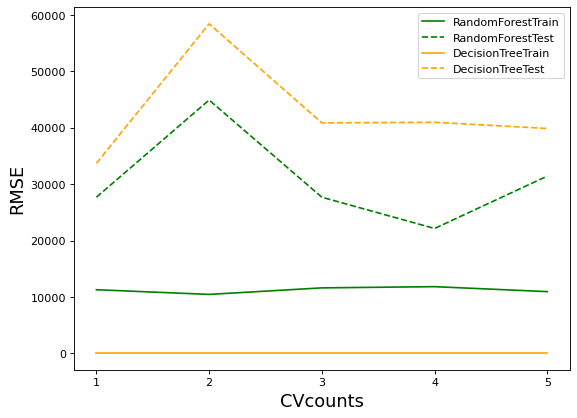

In [37]:
#默认值下随机森林的RMSE与标准差std
xaxis = range(1,6)
plt.figure(figsize=(8,6),dpi=80)
#RMSE
plt.plot(xaxis,trainRMSE_f,color="green",label = "RandomForestTrain")
plt.plot(xaxis,testRMSE_f,color="green",linestyle="--",label = "RandomForestTest")
plt.plot(xaxis,trainRMSE_t,color="orange",label = "DecisionTreeTrain")
plt.plot(xaxis,testRMSE_t,color="orange",linestyle="--",label = "DecisionTreeTest")
plt.xticks([1,2,3,4,5])
plt.xlabel("CVcounts",fontsize=16)
plt.ylabel("RMSE",fontsize=16)
plt.legend()
plt.show()

- 横坐标：交叉验证次数
- 纵坐标：RMSE数值

从图像来看，森林与决策树都处于过拟合状态，不过森林的过拟合程度较轻，决策树的过拟合程度较强。两个算法在训练集上的结果都比较优秀，决策树的可以完美学习训练集上的内容，达到RMSE=0的程度，而随机森林在训练集上的RMSE大约在1w上下徘徊，测试集上的结果则是随机森林更占优。**可见，与填写的参数无关，随机森林天生就是比决策树更不容易过拟合、泛化能力更强的**。

## 2 随机森林回归器的参数

当填写参数之后，随机森林可以变得更强大。比起经典机器学习算法逻辑回归、岭回归等，随机森林回归器的参数数量较多，因此我们可以将随机森林类的参数分为如下4大类别，其中标注为绿色的是我们从未学过的、只与集成算法相关的参数：

|类型|参数|
|---|---|
|**弱分类器数量**|**<font color="green">n_estimators</font>**|
|**弱分类器的训练数据**|**<font color="green">bootstrap, oob_score, max_samples</font>**, max_features, random_state|
|**弱分类器结构**|criterion, max_depth, min_samples_split, <br>min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes,<br>min_impurity_decrease|
|**其他**|n_jobs, verbose, ccp_alpha|

### 2.1 弱分类器结构

**在集成算法当中，控制单个弱评估器的结构是一个重要的课题，因为单个弱评估器的复杂度/结果都会影响全局**，其中单棵决策树的结构越复杂，集成算法的整体复杂度会更高，计算会更加缓慢、模型也会更加容易过拟合，因此集成算法中的弱评估器也需要被剪枝。随机森林回归器的弱评估器是回归树，因此集成评估器中有大量的参数都与弱评估器回归树中的参数重合：

|类型|参数|
|----|----|
|**弱分类器结构**|criterion：弱评估器分枝时的不纯度衡量指标<br><br>max_depth：弱评估器被允许的最大深度，默认None<br><br>min_samples_split：弱评估器分枝时，父节点上最少要拥有的样本个数<br><br>min_samples_leaf：弱评估器的叶子节点上最少要拥有的样本个数<br><br>min_weight_fraction_leaf：当样本权重被调整时，叶子节点上最少要拥有的样本权重<br><br>max_leaf_nodes：弱评估器上最多可以有的叶子节点数量<br><br>min_impurity_decrease：弱评估器分枝时允许的最小不纯度下降量|

这些参数在随机森林中的**用法与默认值**与决策树类`DecisionTreeRegressor`中完全一致，专门用于对决策树进行剪枝、控制单个弱评估器的结构，考虑到大家在决策树中已经充分掌握这些参数，我们不再对这些参数一一进行详细说明了。在这里，我们重点复习一下以下两部分参数：

- 分枝标准与特征重要性

> criterion与feature_importances_

与分类树中的信息熵/基尼系数不同，回归树中的criterion可以选择"squared_error"（平方误差），"absolute_error"（绝对误差）以及"poisson"（泊松偏差）。对任意样本$i$而言，$y_i$为真实标签，$\hat{y_i}$为预测标签，则各个criterion的表达式为：

平方误差：$\sum{(y_i - \hat{y_i})^2}$<br><br>
绝对误差：$\sum{|y_i - \hat{y_i}|}$<br><br>
泊松偏差：$2\sum{(y_ilog(\frac{y_i}{\hat{y_i}})-(y_i - \hat{y_i}))}$

其中平方误差与绝对误差是大家非常熟悉的概念，作为分枝标准，平方误差比绝对误差更敏感（类似于信息熵比基尼系数更敏感），并且在计算上平方误差比绝对误差快很多。泊松偏差则是适用于一个特殊场景的：当需要预测的标签全部为正整数时，标签的分布可以被认为是类似于泊松分布的。正整数预测在实际应用中非常常见，比如预测点击量、预测客户/离职人数、预测销售量等。我们现在正在使用的数据（房价预测），也可能比较适合于泊松偏差。

另外，当我们选择不同的criterion之后，决策树的feature_importances_也会随之变化，因为在sklearn当中，feature_importances_是特征对criterion下降量的总贡献量，因此不同的criterion可能得到不同的特征重要性。

对我们来说，选择criterion的唯一指标就是最终的交叉验证结果——无论理论是如何说明的，我们只取令随机森林的预测结果最好的criterion。

- 调节树结构来控制过拟合

> max_depth

最粗犷的剪枝方式，从树结构层面来看，对随机森林抗过拟合能力影响最大的参数。max_depth的默认值为None，也就是不限深度。因此当随机森林表现为过拟合时，选择一个小的max_depth会很有效。

> max_leaf_nodes与min_sample_split

比max_depth更精细的减枝方式，但限制叶子数量和分枝，既可以实现微调，也可以实现大刀阔斧的剪枝。max_leaf_nodes的默认值为None，即不限叶子数量。min_sample_split的默认值为2，等同于不限制分枝。

> min_impurity_decrease

最精细的减枝方式，可以根据不纯度下降的程度减掉相应的叶子。默认值为0，因此是个相当有空间的参数。

### 2.2 弱分类器数量

> n_estimators

n_estimators是森林中树木的数量，即弱评估器的数量，在sklearn中默认100，它是唯一一个对随机森林而言必填的参数。**n_estimators对随机森林模型的精确程度、复杂度、学习能力、过拟合情况、需要的计算量和计算时间都有很大的影响，因此n_estimators往往是我们在调整随机森林时第一个需要确认的参数**。对单一决策树而言，模型复杂度由树结构（树深、树宽、树上的叶子数量等）与数据量（样本量、特征量）决定，而对随机森林而言，模型复杂度由森林中树的数量、树结构与数据量决定，其中树的数量越多，模型越复杂。

还记得讲解决策树与逻辑回归时我们绘制的这张图像么？当模型复杂度上升时，模型的泛化能力会先增加再下降（相对的泛化误差会先下降再上升），我们需要找到模型泛化能力最佳的复杂度。**在实际进行训练时，最佳复杂度往往是一个比较明显的转折点**，当复杂度高于最佳复杂度时，模型的泛化误差要么开始上升，要么不再下降。

<img src="https://tva1.sinaimg.cn/large/008i3skNly1gs3wqah1w2j30pu0iaadu.jpg" alt="1" style="zoom:33%;" />

对随机森林而言，该图像的横坐标可以被无缝切换为参数n_estimators上的值。当n_estimators越大时：
- 模型的复杂程度上升，泛化能先增强再减弱（或不变）
- 模型的学习能力越来越强，在训练集上的分数可能越来越高，过拟合风险越来越高
- 模型需要的算力和内存越来越多
- 模型训练的时间会越来越长

因此在调整n_estimators时，**我们总是渴望在模型效果与训练难度之间取得平衡**，同时我们还需要使用交叉验证来随时关注模型过拟合的情况。在sklearn现在的版本中，n_estimators的默认值为100，个人电脑能够容忍的n_estimators数量大约在200~1000左右。

In [13]:
def RMSE(cvresult,key):
    return (abs(cvresult[key])**0.5).mean()

In [39]:
reg_f = RFR(n_estimators=3)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [40]:
RMSE(result_f,"test_score")

36398.0444570051

In [42]:
reg_f = RFR(n_estimators=100)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


In [43]:
RMSE(result_f,"test_score")

30156.835268943938

In [15]:
reg_f = RFR(n_estimators=500)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


In [16]:
RMSE(result_f,"test_score")

30305.720408696703

总结：

|类型|参数|
|---|---|
|**弱分类器数量**|<font color="green">**n_estimators**</font>：弱评估器的数量|

### 2.3 弱分类器训练的数据

还记得决策树是如何分枝的吗？对每个特征决策树都会找到不纯度下降程度最大的节点进行分枝，因此原则上来说，只要给出数据一致、并且不对决策树进行减枝的话，决策树的结构一定是完全相同的。对集成算法来说，平均多棵相同的决策树的结果并没有意义，因此集成算法中每棵树必然是不同的树，Bagging算法是依赖于随机抽样数据来实现这一点的。

随机森林会**从提供的数据中随机抽样出不同的子集，用于建立多棵不同的决策树**，最终再按照Bagging的规则对众多决策树的结果进行集成。因此在随机森林回归器的参数当中，有数个关于数据随机抽样的参数。

- 样本的随机抽样
> bootstrap，oob_score，max_samples

**bootstrap参数的输入为布尔值，默认True，控制是否在每次建立决策树之前对数据进行随机抽样**。如果设置为False，则表示每次都使用全部样本进行建树，如果为True，则随机抽样建树。从语言的意义上来看，`bootstrap`可以指代任意类型的随机抽样，但在随机森林中它特指**有放回随机抽样技术**。

如下图所示，在一个含有m个样本的原始训练集中，我们进行随机采样。每次采样一个样本，并在抽取下一个样本之前将**该样本放回原始训练集**，也就是说下次采样时这个样本依然可能被采集到，这样采集`max_samples`次，最终得到`max_samples`个样本组成的自助集。

![RF3](https://pictes.oss-cn-beijing.aliyuncs.com/%E5%BE%AE%E8%AF%BE%20-%20sklearn/RFC/RF3.png)

**通常来说，max_samples是等于m的（行业惯例），也就是抽样数据集的大小与原始数据集一致，但是如果原始数据集太大、或者太小，我们也可以自由调整`max_samples`的大小**。由于是随机采样，这样每次的自助集和原始数据集不同，和其他的采样集也是不同的。这样我们就可以自由创造取之不尽用之不竭，并且互不相同的自助集，用这些自助集来训练我们的弱分类器，我们的弱分类器自然也就各不相同了。

然而有放回抽样也会有自己的问题。由于是有放回，一些样本可能在同一个自助集中出现多次，而其他一些却可能被忽略。**当抽样次数足够多、且原始数据集足够大时**，自助集大约平均会包含全数据的63%，这个数字是有数学依据的。因为在max_samples次抽样中，一个样本被抽到某个自助集中的概率为：

$$
1-(1-\frac{1}{m})^{max\_samples}
$$

这个式子是怎么来的呢？对于任意一个样本而言：<br><br>
一次抽样时抽到该样本的概率为$\frac{1}{m}$<br><br>
一次抽样时抽不到该样本的概率为$1-\frac{1}{m}$<br><br>
总共抽样`max_samples`次，一次也没有抽到该样本的概率就是$(1-\frac{1}{m})^{max\_samples}$<br><br>
因此1减去该概率，就是一个样本在抽样中一定会被抽到某个自助集的概率。
当m刚好等于`max_samples`时，公式可以被修改为：

$$
1-(1-\frac{1}{m})^{m}
$$

这明显是一个经典的极限问题，由洛必达法则（L'Hôpital's rule）我们可知：当m足够大时（接近极限时），这个概率收敛于1-(1/e)，其中e是自然常数，整体概率约等于0.632。因此，会有约37%的训练数据被浪费掉，没有参与建模，这些数据被称为袋外数据(out of bag data，简写为oob)。在实际使用随机森林时，袋外数据常常被我们当做验证集使用，所以我们或许可以不做交叉验证、不分割数据集，而只依赖于袋外数据来测试我们的模型即可。当然，这也不是绝对的，当树的数量`n_estimators`不足，或者`max_samples`太小时，很可能就没有数据掉落在袋外，自然也有无法使用oob数据来作为验证集了。

在随机森林回归器中，当boostrap=True时，我们可以使用参数`oob_score`和`max_samples`，其中：

**oob_score控制是否使用袋外数据进行验证**，输入为布尔值，默认为False，如果希望使用袋外数据进行验证，修改为True即可。

**max_samples表示自助集的大小**，可以输入整数、浮点数或None，默认为None。
> 输入整数m，则代表每次从全数据集中有放回抽样m个样本<br>
> 输入浮点数f，则表示每次从全数据集中有放回抽样f\*全数据量个样本<br>
> 输入None，则表示每次抽样都抽取与全数据集一致的样本量（X.shape[0]）<br>

在使用袋外数据时，我们可以用随机森林的另一个重要属性：`oob_score_`来查看我们的在袋外数据上测试的结果，遗憾的是我们无法调整`oob_score_`输出的评估指标，它默认是R2。

In [18]:
reg = RFR(n_estimators=20
          , bootstrap=True #进行随机抽样
          , oob_score=True #按袋外数据进行验证
          , max_samples=500
         ).fit(X,y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [39]:
#重要属性oob_score_
reg.oob_score_ #在袋外数据上的R2为83%

0.8254774869029703

In [19]:
reg = RFR(n_estimators=20
          , bootstrap=False
          , oob_score=True
          , max_samples=500).fit(X,y) #直接无法运行，因为boostrap=False时oob_score分数根本不存在

ValueError: Out of bag estimation only available if bootstrap=True

In [20]:
reg = RFR(n_estimators=20
          , bootstrap=True #允许抽样
          , oob_score=False #但不进行计算
          , max_samples=500).fit(X,y)

In [21]:
reg.oob_score_ #虽然可以训练，但oob_score无法被调用

AttributeError: 'RandomForestRegressor' object has no attribute 'oob_score_'

- 特征的随机抽样
> max_features

数据抽样还有另一个维度：对特征的抽样。在学习决策树时，我们已经学习过对特征进行抽样的参数max_features，在随机森林中max_features的用法与决策树中完全一致，其输入也与决策树完全一致：

> 输入整数，表示每次分枝时随机抽取max_features个特征<br>
> 输入浮点数，表示每次分枝时抽取round(max_features * n_features)个特征<br>
> 输入"auto"或者None，表示每次分枝时使用全部特征n_features<br>
> 输入"sqrt"，表示每次分枝时使用sqrt(n_features)<br>
> 输入"log2"，表示每次分枝时使用log2(n_features)<br>

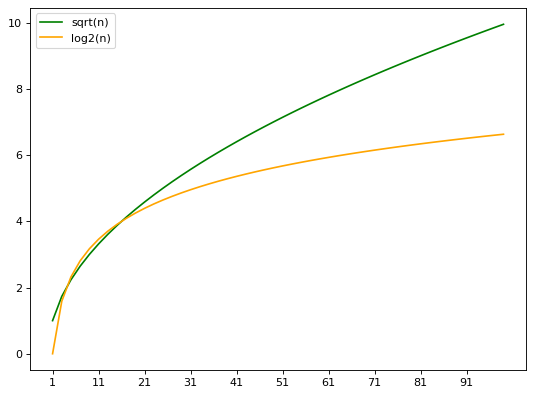

In [42]:
sqrt_ = []
log_ = []
for n_features in range(1,101,2):
    sqrt_.append(np.sqrt(n_features))
    log_.append(np.log2(n_features))    
xaxis = range(1,101,2)
plt.figure(figsize=(8,6),dpi=80)
#RMSE
plt.plot(xaxis,sqrt_,color="green",label = "sqrt(n)")
plt.plot(xaxis,log_,color="orange",label = "log2(n)")
plt.xticks(range(1,101,10))
plt.legend()
plt.show()

不难发现，sqrt(n_features)和log2(n_features)都会返回一个比原始特征量小很多的数，但一般情况下log2返回的值比sqrt返回的值更小，因此如果我们想要树之间的差异更大，我们可以设置模式为log2。在实际使用时，我们往往会先使用上述的文字输入，观察模型的结果，然后再在有效的范围附近进行网格搜索。

**需要注意的是，无论对数据进行怎样的抽样，我们能够控制的都只是建立单棵树时的数据而已**。在总数据量有限的情况下，单棵树使用的数据量越大，每一棵树使用的数据就会越相似，每棵树的结构也就会越相似，bagging的效果难以发挥、模型也很容易变得过拟合。因此，当数据量足够时，我们往往会消减单棵树使用的数据量。

- 随机抽样的模式
> random_state

In [48]:
### 随机模式说明

random_state是一个较为抽象的参数，对于刚接触sklearn运作方式的人们来说，random_state可能会比较难以理解。

在日常生活中，当我们讨论“随机”时，我们指的是**真正的随机**：
- 不可预测
- 不可有目的地重复
- 实验之间完全相互独立

~~比如游戏当中抽卡~~，比如抛硬币，我们无法预料会抛出正面还是反面、并且抛出一次正面自后、无法有目的地再次抛出正面，无论上一次是正面还是反面，都不影响下一次抛硬币的时候的结果。**真正的随机一定伴随着物理实验，是只有自然界才有的现象**。

在计算机的世界中，任意的“随机”一定是通过某种计算方式得到和实现的，这种随机是“伪随机”。无论是随机抽样，还是随机打乱数据顺序等等，其实背后都有着计算机的规则在进行控制，**只要我们找到背后的规则，我们就可以有目的地重复随机的结果，而random_state就是在随机过程当中，控制随机规则的参数**。

例如，现在我们需要在[1,2,3,4,5]中随机抽取3个数字，我们可以有多种规则：
<br><br>
0号规则：4,5,1<br>
1号规则：2,1,5<br>
2号规则：1,5,4<br>
3号规则：2,5,4<br>
....

list_ = [1,2,3,4,5]

import random
random.sample(list_,k=3) #随机从列表中抽取样本，抽取3个

根据排列组合的规则，总共有$A_5^3$=60种选择。每当我们执行抽样的代码时，计算机会在所有规则中选择一个返回给我们。当我们多次执行抽样代码，计算机会返回不同的结果，营造一种“随机”的氛围，但并非真正的在列表中进行了“不可预测、不可重复”的抽样。

**只要我们设置随机数种子，我们就可以重复抽样的结果，令本来应该“随机”的过程变成固定过程**。

#random.seed是random模块中的随机数种子，等同于sklearn中的random_state
random.seed(0) #0号规则
random.sample(list_,k=3)

random.seed(2)
random.sample(list_,k=3)

即便只有60种选择，我们的随机数种子也可以设置为任意的数字。当然，无论我们设置怎样的数字，最终计算机都会从这60中选择中挑选一个返回给我们，这也是计算机的规则决定的。无论我们输入了什么数字，只要我们认为当下随机操作返回的结果是可以接受的，就可以持续使用我们设置的数字。

random.seed(1412)
random.sample(list_,k=3)

random.seed(2333)
random.sample(list_,k=3)

在决策树当中，我们已经学习过控制随机模式的参数`random_state`，这个参数是“随机数种子”，它控制决策树当中多个具有随机性的流程。在sklearn实现的随机森林当中，决策树上也存在众多有随机性的流程：

- <font color=red>「强制」随机抽取每棵树建立时分枝用的特征</font>，抽取的数量可由参数max_features决定
- <font color=red>「强制」随机排序每棵树分枝时所用的特征</font>
- 「可选」随机抽取每棵树建立时训练用的样本，抽取的比例可由参数max_samples决定

因此每次使用随机森林类时，我们建立的集成算法都是不同的，在同一个数据集上多次建树自然也会产生不同的模型结果。因此在工程部署和教学当中，我们在建树的第一步总是会先设置随机数种子为一个固定值，让算法固定下来。在设置的时候，需要注意两个问题：

**1、不同库中的随机数种子遵循不同的规则，对不同库中的随机数种子给与相同的数字，也不会得到相同的结果**

In [49]:
import pandas as pd
import random

list_ = [1,2,3,4,5]
list_p = pd.Series(list_)

list_p

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [50]:
#random中的随机抽样
random.seed(1)
random.sample(list_,k=3)

[2, 1, 5]

In [51]:
#pandas中的随机抽样
list_p.sample(n=3,random_state=1).values

array([3, 2, 5], dtype=int64)

同样的，sklearn中的随机抽样、numpy中的随机抽样、cuda中的随机抽样在相同的随机数种子数值下，都会得到不同的结果。

**2、如何选择最佳随机数种子？**

当数据样本量足够大的时候（数万），变换随机数种子几乎不会对模型的泛化能力有影响，因此在数据量巨大的情况下，我们可以随意设置任意的数值。

**当数据量较小的时候，我们可以把随机数种子当做参数进行调整，但前提是必须依赖于交叉验证的结果**。选择交叉验证结果中均值最高、方差最低的随机数种子，以找到泛化能力最强大的随机模式。

|类型|参数|
|---|---|
|**弱分类器的训练数据**|<font color="green">**bootstrap**</font>：是否对样本进行随机抽样<br><br><font color="green">**oob_score**</font>：如果使用随机抽样，是否使用袋外数据作为验证集<br><br><font color="green">**max_samples**</font>：如果使用随机抽样，每次随机抽样的样本量<br><br>max_features：随机抽取特征的数目<br><br>random_state：控制一切随机模式|

### 2.4 其他参数

|类型|参数|
|---|---|
|**其他**|n_jobs：允许调用的线程数<br><br>verbose：打印建树过程<br><br>ccp_alpha：结构风险$|\widetilde{T}|$上的系数，可用于控制过拟合<br><br>warm_start：支持增量学习|

我们已经了解过前三个参数。需要稍微说明一下`verbose`参数。随机森林的`verbose`参数打印的是建树过程，但只有在树的数量众多、建模耗时很长时，`verbose`才会打印建树的具体过程，否则它只会打印出一行两简单的报告。这些参数中需要重点说明的是`warm_start`。`warm_start`是控制增量学习的参数，默认为False，该参数可以帮助随机森林处理巨量数据，解决围绕随机森林的众多关键问题。我们将在之后的章节中重点讲解`warm_start`的应用。

# 四 集成算法的参数空间与网格优化

如随机森林中所展示的，集成算法的超参数种类繁多、取值丰富，且参数之间会相互影响、共同作用于算法的最终结果，因此集成算法的调参是一个难度很高的过程。在超参数优化还未盛行的时候，随机森林的调参是基于方差-偏差理论（variance-bias trade-off）和学习曲线完成的，而现在我们可以依赖于网格搜索来完成自动优化。在对任意算法进行网格搜索时，我们需要明确两个基本事实：

1、参数对算法结果的影响力大小<br>
2、用于进行搜索的参数空间<br>

对随机森林来说，我们可以大致如下排列各个参数对算法的影响：

|影响力|参数|
|:-:|:-:|
|⭐⭐⭐⭐⭐<br>几乎总是具有巨大影响力|n_estimators（整体学习能力）<br>max_depth（粗剪枝）<br>max_features（随机性）<br>|
|⭐⭐⭐⭐<br>大部分时候具有影响力|max_samples（随机性）<br>class_weight（样本均衡）|
|⭐⭐<br>可能有大影响力<br>大部分时候影响力不明显|min_samples_split（精剪枝）<br>min_impurity_decrease（精剪枝）<br>max_leaf_nodes（精剪枝）<br>criterion（分枝敏感度）|
|⭐<br>当数据量足够大时，几乎无影响|random_state<br>ccp_alpha（结构风险）|

随机森林在剪枝方面的空间总是很大的，因为默认参数下树的结构基本没有被影响（也就是几乎没有剪枝），因此当随机森林过拟合的时候，我们可以尝试粗、精、随机等各种方式来影响随机森林。通常在网格搜索当中，我们会考虑所有有巨大影响力的参数、以及1、2个影响力不明显的参数。

虽然随机森林调参的空间较大，大部分人在调参过程中依然难以突破，因为**树的集成模型的参数空间非常难以确定**。当没有数据支撑时，人们很难通过感觉或经验来找到正确的参数范围。举例来说，我们也很难直接判断究竟多少棵树对于当前的模型最有效，同时，我们也很难判断不剪枝时一棵决策树究竟有多深、有多少叶子、或者一片叶子上究竟有多少个样本，更不要谈凭经验判断树模型整体的不纯度情况了。可以说，当森林建好之后，我们简直是对森林一无所知。对于网格搜索来说，新增一个潜在的参数可选值，计算量就会指数级增长，因此找到有效的参数空间非常重要。此时我们就要引入两个工具来帮助我们：

1、学习曲线<br>
2、决策树对象Tree的属性<br>

- 学习曲线

学习曲线是以参数的不同取值为横坐标，模型的结果为纵坐标的曲线。当模型的参数较少、且参数之间的相互作用较小时，我们可以直接使用学习曲线进行调参。但对于集成算法来说，学习曲线更多是我们探索参数与模型关系的关键手段。许多参数对模型的影响是确定且单调的，例如`n_estimators`，树越多模型的学习能力越强，再比如`ccp_alpha`，该参数值越大模型抗过拟合能力越强，因此我们可能通过学习曲线找到这些参数对模型影响的极限。我们会围绕这些极限点来构筑我们的参数空间。

先来看看n_estimators的学习曲线：

In [22]:
#参数潜在取值，由于现在我们只调整一个参数，因此参数的范围可以取大一些、取值也可以更密集
Option = [1,*range(5,101,5)]

In [45]:
#生成保存模型结果的arrays
trainRMSE = np.array([])
testRMSE = np.array([])
trainSTD = np.array([])
testSTD = np.array([])

#在参数取值中进行循环
for n_estimators in Option:
    
    #按照当下的参数，实例化模型
    reg_f = RFR(n_estimators=n_estimators,random_state=1412)
    
    #实例化交叉验证方式，输出交叉验证结果
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                              ,return_train_score=True
                              ,n_jobs=-1)
    
    #根据输出的MSE进行RMSE计算
    train = abs(result_f["train_score"])**0.5
    test = abs(result_f["test_score"])**0.5
    
    #将本次交叉验证中RMSE的均值、标准差添加到arrays中进行保存
    trainRMSE = np.append(trainRMSE,train.mean()) #效果越好
    testRMSE = np.append(testRMSE,test.mean())
    trainSTD = np.append(trainSTD,train.std()) #模型越稳定
    testSTD = np.append(testSTD,test.std())

In [46]:
def plotCVresult(Option,trainRMSE,testRMSE,trainSTD,testSTD):
    #一次交叉验证下，RMSE的均值与std的绘图
    xaxis = Option
    plt.figure(figsize=(8,6),dpi=80)

    #RMSE
    plt.plot(xaxis,trainRMSE,color="k",label = "RandomForestTrain")
    plt.plot(xaxis,testRMSE,color="red",label = "RandomForestTest")

    #标准差 - 围绕在RMSE旁形成一个区间
    plt.plot(xaxis,trainRMSE+trainSTD,color="k",linestyle="dotted")
    plt.plot(xaxis,trainRMSE-trainSTD,color="k",linestyle="dotted")
    plt.plot(xaxis,testRMSE+testSTD,color="red",linestyle="dotted")
    plt.plot(xaxis,testRMSE-testSTD,color="red",linestyle="dotted")
    plt.xticks([*xaxis])
    plt.legend(loc=1)
    plt.show()

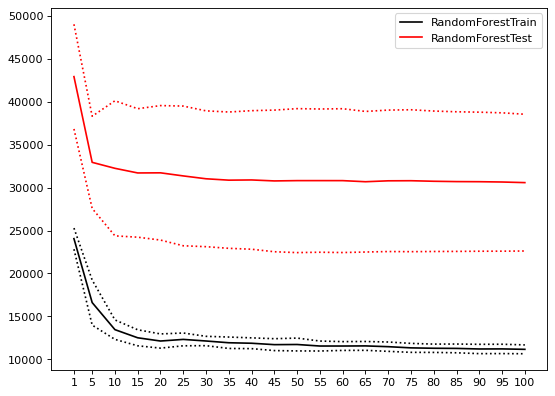

In [47]:
plotCVresult(Option,trainRMSE,testRMSE,trainSTD,testSTD)

当绘制学习曲线时，我们可以很容易找到泛化误差开始上升、或转变为平稳趋势的转折点。因此我们可以选择转折点或转折点附近的n_estimators取值，例如20。然而，n_estimators会受到其他参数的影响，例如：

> - 单棵决策树的结构更简单时（依赖剪枝时），可能需要更多的树
> - 单棵决策树训练的数据更简单时（依赖随机性时），可能需要更多的树

因此n_estimators的参数空间可以被确定为range(20,100,5)，如果你比较保守，甚至可以确认为是range(15,25,5)。

- 决策树对象Tree

在sklearn中，树模型是单独的一类对象，每个树模型背后都有一套完整的属性供我们调用，包括树的结构、树的规模等众多细节。在之前的课程中，我们曾经使用过树模型的绘图功能plot_tree，除此之外树还有许多有用的属性。随机森林是树组成的算法，因此也可以调用这些属性。我们来举例说明：

In [25]:
reg_f = RFR(n_estimators=10,random_state=1412)
reg_f = reg_f.fit(X,y) #训练一个随机森林

> 属性`.estimators_`，查看森林中所有的树

In [26]:
reg_f.estimators_ #一片随机森林中所有的树

[DecisionTreeRegressor(max_features='auto', random_state=1630984966),
 DecisionTreeRegressor(max_features='auto', random_state=472863509),
 DecisionTreeRegressor(max_features='auto', random_state=1082704530),
 DecisionTreeRegressor(max_features='auto', random_state=1930362544),
 DecisionTreeRegressor(max_features='auto', random_state=273973624),
 DecisionTreeRegressor(max_features='auto', random_state=21991934),
 DecisionTreeRegressor(max_features='auto', random_state=1886585710),
 DecisionTreeRegressor(max_features='auto', random_state=63725675),
 DecisionTreeRegressor(max_features='auto', random_state=1374343434),
 DecisionTreeRegressor(max_features='auto', random_state=1078007175)]

In [29]:
#可以用索引单独提取一棵树
reg_f.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=1630984966)

In [30]:
#调用这棵树的底层结构
reg_f.estimators_[0].tree_

> 属性`.max_depth`，查看当前树的实际深度

In [31]:
reg_f.estimators_[0].tree_.max_depth #max_depth=None

19

In [32]:
#对森林中所有树查看实际深度
for t in reg_f.estimators_:
    print(t.tree_.max_depth)

19
25
27
20
23
22
22
20
22
24


In [33]:
#如果树的数量较多，也可以查看平均或分布
reg_f = RFR(n_estimators=100,random_state=1412)
reg_f = reg_f.fit(X,y) #训练一个随机森林
d = pd.Series([],dtype="int64")
for idx,t in enumerate(reg_f.estimators_):
    d[idx] = t.tree_.max_depth

In [35]:
d.mean()

22.25

In [101]:
d.describe()

count    100.000000
mean      22.250000
std        1.955954
min       19.000000
25%       21.000000
50%       22.000000
75%       23.000000
max       30.000000
dtype: float64

假设现在你的随机森林过拟合，max_depth的最大深度范围设置在[15,25]之间就会比较有效，如果我们希望激烈地剪枝，则可以设置在[10,15]之间。

相似的，我们也可以调用其他属性来辅助我们调参：

|参数|参数含义|对应属性|属性含义|
|:-:|:-:|:-:|:-:|
|n_estimators|树的数量|reg.estimators_|森林中所有树对象|
|max_depth|允许的最大深度|.tree_.max_depth|0号树实际的深度|
|max_leaf_nodes|允许的最大<br>叶子节点量|.tree_.node_count|0号树实际的总节点量|
|min_sample_split|分枝所需最小<br>样本量|.tree_.n_node_samples|0号树每片叶子上实际的样本量|
|min_weight_fraction_leaf|分枝所需最小<br>样本权重|tree_.weighted_n_node_samples|0号树每片叶子上实际的样本权重|
|min_impurity_decrease|分枝所需最小<br>不纯度下降量|.tree_.impurity<br>.tree_.threshold|0号树每片叶子上的实际不纯度<br>0号树每个节点分枝后不纯度下降量|

In [36]:
#一棵树上的总叶子量
reg_f.estimators_[0].tree_.node_count

1807

In [110]:
#所有树上的总叶子量
for t in reg_f.estimators_:
    print(t.tree_.node_count)

1807
1777
1763
1821
1777
1781
1811
1771
1753
1779


**根据经验，当决策树不减枝且在训练集上的预测结果不错时，一棵树上的叶子量常常与样本量相当或比样本量更多，算法结果越糟糕，叶子量越少**，如果RMSE很高或者R2很低，则可以考虑使用样本量的一半或3/4作为不减枝时的叶子量的参考。

In [40]:
#每个节点上的不纯度下降量，为-2则表示该节点是叶子节点
reg_f.estimators_[0].tree_.threshold.tolist()[:20]

[6.5,
 5.5,
 327.0,
 214.0,
 0.5,
 1.0,
 104.0,
 0.5,
 -2.0,
 -2.0,
 -2.0,
 105.5,
 28.5,
 0.5,
 1.5,
 -2.0,
 -2.0,
 11.0,
 1212.5,
 2.5]

In [46]:
#你怎么知道min_impurity_decrease的范围设置多少会剪掉多少叶子？
pd.Series(reg_f.estimators_[0].tree_.threshold).value_counts().sort_index()

-2.0       904
 0.5        43
 1.0        32
 1.5        56
 2.0        32
          ... 
 1118.5      1
 1162.5      1
 1212.5      2
 1254.5      1
 1335.5      1
Length: 413, dtype: int64

In [63]:
pd.set_option("display.max_rows",None)
np.cumsum(pd.Series(reg_f.estimators_[0].tree_.threshold).value_counts().sort_index()[1:])

1.0        32
1.5        88
2.0       120
2.5       167
3.0       189
3.5       208
4.0       224
4.5       249
5.0       258
5.5       271
6.0       276
6.5       287
7.0       302
7.5       307
8.0       313
8.5       321
9.0       326
9.5       334
10.0      335
10.5      343
11.0      346
11.5      348
12.0      349
12.5      353
13.0      355
13.5      359
14.0      360
14.5      361
15.5      364
16.0      366
17.5      368
18.0      370
18.5      372
19.0      374
19.5      377
20.0      378
20.5      379
21.0      382
22.0      385
22.5      387
23.0      389
24.0      391
24.5      392
26.0      394
26.5      396
27.0      398
27.5      399
28.5      400
29.5      401
30.0      402
31.0      404
31.5      405
32.0      407
32.5      408
33.0      409
34.0      410
34.5      411
35.0      413
35.5      416
36.0      417
36.5      419
37.0      420
37.5      422
38.0      424
39.5      427
40.0      428
40.5      429
41.0      433
42.0      435
43.0      436
43.5      439
44.0  

从这棵树反馈的结果来看，min_impurity_decrease在现在的数据集上至少要设置到[2,10]的范围才可能对模型有较大的影响。

In [120]:
#min_sample_split的范围要如何设置才会剪掉很多叶子？
np.bincount(reg_f.estimators_[0].tree_.n_node_samples.tolist())[:10]

array([  0, 879, 321, 154,  86,  52,  42,  38,  29,  18], dtype=int64)

更多属性可以参考：

In [64]:
from sklearn.tree._tree import Tree

In [65]:
type(Tree)

type

In [66]:
help(Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

- 使用网格搜索在随机森林上进行调参

|影响力|参数|
|:-:|:-:|
|⭐⭐⭐⭐⭐<br>几乎总是具有巨大影响力|n_estimators（整体学习能力）<br>max_depth（粗剪枝）<br>max_features（随机性）<br>|
|⭐⭐⭐⭐<br>大部分时候具有影响力|max_samples（随机性）<br>class_weight（样本均衡）|
|⭐⭐<br>可能有大影响力<br>大部分时候影响力不明显|min_samples_split（精剪枝）<br>min_impurity_decrease（精剪枝）<br>max_leaf_nodes（精剪枝）<br>criterion（分枝敏感度）|
|⭐<br>当数据量足够大时，几乎无影响|random_state<br>ccp_alpha（结构风险）|

现在模型正处于过拟合的状态，需要抗过拟合，且整体数据量不是非常多，随机抽样的比例不宜减小，因此我们挑选以下五个参数进行搜索：`n_estimators`，`max_depth`，`max_features`，`min_impurity_decrease`，`criterion`。

In [19]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mlp
import matplotlib.pyplot as plt
import time #计时模块time
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_validate, KFold, GridSearchCV

In [2]:
def RMSE(cvresult,key):
    return (abs(cvresult[key])**0.5).mean()

In [3]:
data = pd.read_csv(r"D:\Pythonwork\2021ML\PART 2 Ensembles\datasets\House Price\train_encode.csv",index_col=0)

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [67]:
X.shape

(1460, 80)

In [68]:
X.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0


> Step 1.建立benchmark

In [21]:
reg = RFR(random_state=1412)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [22]:
result_pre_adjusted = cross_validate(reg,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [23]:
RMSE(result_pre_adjusted,"train_score")

11177.272008319653

In [24]:
RMSE(result_pre_adjusted,"test_score")

30571.26665524217

> Step 2.创建参数空间

In [5]:
param_grid_simple = {"criterion": ["squared_error","poisson"]
                     , 'n_estimators': [*range(20,100,5)]
                     , 'max_depth': [*range(10,25,2)]
                     , "max_features": ["log2","sqrt",16,32,64,"auto"]
                     , "min_impurity_decrease": [*np.arange(0,5,10)]
                    }

> Step 3.实例化用于搜索的评估器、交叉验证评估器与网格搜索评估器

In [6]:
#n_jobs=4/8,verbose=True
reg = RFR(random_state=1412,verbose=True,n_jobs=-1)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
search = GridSearchCV(estimator=reg
                     ,param_grid=param_grid_simple
                     ,scoring = "neg_mean_squared_error"
                     ,verbose = True
                     ,cv = cv
                     ,n_jobs=-1)

> Step 4.训练网格搜索评估器

In [7]:
#=====【TIME WARNING: 7mins】=====#
start = time.time()
search.fit(X,y)
print(time.time() - start)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
381.6039867401123


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    0.0s finished


> Step 5.查看结果

In [10]:
search.best_estimator_

RandomForestRegressor(max_depth=23, max_features=16, min_impurity_decrease=0,
                      n_estimators=85, n_jobs=-1, random_state=1412,
                      verbose=True)

In [9]:
abs(search.best_score_)**0.5

29179.698261599166

In [11]:
ad_reg = RFR(n_estimators=85, max_depth=23, max_features=16, random_state=1412)

In [15]:
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
result_post_adjusted = cross_validate(ad_reg,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [16]:
RMSE(result_post_adjusted,"train_score")

11000.81099038192

In [17]:
RMSE(result_post_adjusted,"test_score")

28572.070208366855

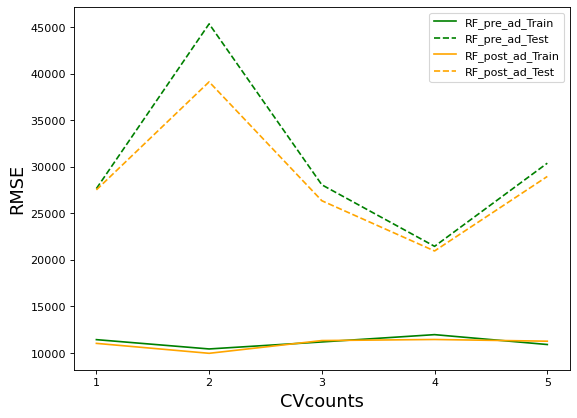

In [26]:
#默认值下随机森林的RMSE
xaxis = range(1,6)
plt.figure(figsize=(8,6),dpi=80)
#RMSE
plt.plot(xaxis,abs(result_pre_adjusted["train_score"])**0.5,color="green",label = "RF_pre_ad_Train")
plt.plot(xaxis,abs(result_pre_adjusted["test_score"])**0.5,color="green",linestyle="--",label = "RF_pre_ad_Test")
plt.plot(xaxis,abs(result_post_adjusted["train_score"])**0.5,color="orange",label = "RF_post_ad_Train")
plt.plot(xaxis,abs(result_post_adjusted["test_score"])**0.5,color="orange",linestyle="--",label = "RF_post_ad_Test")
plt.xticks([1,2,3,4,5])
plt.xlabel("CVcounts",fontsize=16)
plt.ylabel("RMSE",fontsize=16)
plt.legend()
plt.show()

不难发现，网格搜索之后的模型过拟合程度减轻，且在训练集与测试集上的结果都有提高，可以说从根本上提升了模型的基础能力。我们还可以根据网格的结果继续尝试进行其他调整，来进一步降低模型在测试集上的RMSE。

# 五 随机森林在巨量数据上的增量学习

集成学习是工业领域中应用最广泛的机器学习算法。实际工业环境下的数据量往往十分巨大，一个训练好的集成算法的复杂程度与训练数据量高度相关，因此企业在应用机器学习时通常会提供强大的计算资源作为支持，也因此当代的大部分集成算法都是支持GPU运算的（相对的，如果你发现一个算法在任何机器学习库中，都没有接入GPU运算的选项，这可能说明该算法在工业应用中基本不会被使用）。

sklearn作为早期开源的机器学习算法库，难以预料到如今人工智能技术走进千家万户的应用状况，因此并未开放接入GPU进行运算的接口，即sklearn中的所有算法都不支持接入更多计算资源。因此当我们想要使用随机森林在巨量数据上进行运算时，很可能会遭遇计算资源短缺的情况。幸运的是，我们有两种方式解决这个问题：

- 使用其他可以接入GPU的机器学习算法库实现随机森林，比如xgboost。
- 继续使用sklearn进行训练，但使用增量学习（incremental learning）。

增量学习是机器学习中非常常见的方法，在有监督和无监督学习当中都普遍存在。**增量学习允许算法不断接入新数据来拓展当前的模型，即允许巨量数据被分成若干个子集，分别输入模型进行训练**。

## 1 普通学习 vs 增量学习

- 普通学习

通常来说，当一个模型经过一次训练之后，如果再使用新数据对模型进行训练，原始数据训练出的模型会被替代掉。举个例子，我们原本的数据集X与y是kaggle房价数据集，结构为：

In [73]:
X.shape

(1460, 80)

In [53]:
y.shape

(1460,)

现在，我们导入sklearn中非常常用的另一个数据集，加利福尼亚房价数据集：

In [77]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [78]:
X_fc = fetch_california_housing().data
y_fc = fetch_california_housing().target

In [82]:
X_fc.shape #可以看到，加利福尼亚房价数据集的特征量为8

(20640, 8)

建模，并在X_,y_基础上进行训练：

In [83]:
model = RFR(n_estimators=3, warm_start=False) #不支持增量学习的

In [84]:
model1 = model.fit(X_fc,y_fc)

In [85]:
#RMSE
(mean_squared_error(y_fc,model1.predict(X_fc)))**0.5

0.30123985583215596

In [86]:
#使用.estimators_查看森林中所有树的情况，可以看到每一棵树的随机数种子
model1.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1785210460),
 DecisionTreeRegressor(max_features='auto', random_state=121562514),
 DecisionTreeRegressor(max_features='auto', random_state=1271073231)]

此时，如果让model1继续在kaggle房价数据集X,y上进行训练：

In [87]:
model1 = model1.fit(X.iloc[:,:8],y)
#注意，X有80个特征，X_fc只有8个特征，输入同一个模型的数据必须结构一致

In [88]:
model1.estimators_ #你发现了吗？model1中原始的树消失了，新的树替代了原始的树

[DecisionTreeRegressor(max_features='auto', random_state=349555903),
 DecisionTreeRegressor(max_features='auto', random_state=1253222501),
 DecisionTreeRegressor(max_features='auto', random_state=2145441582)]

再让model1对加利福尼亚房价数据集进行训练，会发生什么呢？别忘了model1之前训练过加利福尼亚房价数据集：

In [90]:
#RMSE
(mean_squared_error(y_fc,model1.predict(X_fc)))**0.5

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


188517.0427626784

RMSE异常巨大，模型现在已经不具备任何预测y_fc的能力了。非常明显，model1中原始的树消失了，基于kaggle数据集训练的树**覆盖**了原始的树，因此model1不再对本来见过的加利福尼亚房价数据报有记忆。

sklearn的这一覆盖规则是交叉验证可以进行的基础，正因为每次训练都不会受到上次训练的影响，我们才可以使用模型进行交叉验证，否则就会存在数据泄露的情况。但在增量学习中，原始数据训练的树不会被替代掉，模型会一致记得之前训练过的数据，我们来看看详细情况：

- 增量学习

我们还是可以使用X,y以及X_fc,y_fc作为例子，这一次，我们让warm_start参数取值为True，允许随机森林进行增量学习：

In [91]:
model = RFR(n_estimators=3, warm_start=True) #支持增量学习

In [92]:
model2 = model.fit(X_fc,y_fc)

In [93]:
(mean_squared_error(y_fc,model2.predict(X_fc)))**0.5

0.30099931130927154

In [94]:
model2.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=338470642),
 DecisionTreeRegressor(max_features='auto', random_state=1545812511),
 DecisionTreeRegressor(max_features='auto', random_state=740599321)]

让X和y在model2上继续进行训练：

In [95]:
model2 = model2.fit(X.iloc[:,:8],y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:421: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [96]:
(mean_squared_error(y_fc,model2.predict(X_fc)))**0.5

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.30099931130927154

你发现了吗？即便已经对X和y进行了训练，但是model2中对加利福尼亚房价数据集的记忆还在，因此在对X_fc与y_fc进行预测时，依然能够取得不错的分数。

In [97]:
model2.estimators_ #在增量学习当中，树没有发生变化

[DecisionTreeRegressor(max_features='auto', random_state=338470642),
 DecisionTreeRegressor(max_features='auto', random_state=1545812511),
 DecisionTreeRegressor(max_features='auto', random_state=740599321)]

所以在增量学习当中，已经训练过的结果会被保留。对于随机森林这样的Bagging模型来说，这意味着之前的数据训练出的树会被保留，新数据会训练出新的树，新旧树互不影响。对于逻辑回归、神经网络这样不断迭代以求解权重$w$的算法来说，新数据训练时w的起点是之前的数据训练完毕之后的w。

不过，这里存在一个问题：虽然原来的树没有变化，但增量学习看起来并没有增加新的树——事实上，对于随机森林而言，我们需要手动增加新的树：

In [ ]:
model2.estimators_ #属性，反映训练完毕的模型的一些特点、一些客观存在的性质

In [98]:
#调用模型的参数，可以通过这种方式修改模型的参数，而不需要重新实例化模型
model2.n_estimators += 2 #增加2棵树，用于增量学习

In [99]:
model2

RandomForestRegressor(n_estimators=5, warm_start=True)

In [100]:
model2.fit(X.iloc[:,:8],y)

RandomForestRegressor(n_estimators=5, warm_start=True)

In [101]:
model2.estimators_ #原来的树还是没有变化，新增的树是基于新输入的数据进行训练的

[DecisionTreeRegressor(max_features='auto', random_state=338470642),
 DecisionTreeRegressor(max_features='auto', random_state=1545812511),
 DecisionTreeRegressor(max_features='auto', random_state=740599321),
 DecisionTreeRegressor(max_features='auto', random_state=1633155700),
 DecisionTreeRegressor(max_features='auto', random_state=623929223)]

## 2 增量学习在Kaggle数据上的应用

- 实际应用

现在我们使用一个385MB的csv文件作为例子，进行巨量数据的导入和训练（当然，在实际中csv文件往往是5G以上，基本不可能使用excel打开进行简单分析或观察）。该数据是来自Kaggle的五大人格心理特质回归数据集。五大人格心理特质是心理学当中常见的人格分类法，也称为FFM模型或OCEAN模型。这种人格分类法是通过给与被调查者一些描述性格方面的句子，让被调查者选择自己符合的项目，例如：

- 考试前我总是提前准备好一切，尽全力避免出错
- 考试前我会花几天时间准备
- 我在考试前临时抱佛脚
- 我考试前从不准备
- 我不在意考试，甚至不记得考试的时间

你从中选择最像你的选项，和最不像你的选项，选择结果最终被用于性格分类。该数据集通过收集100w人群在大约80个问题当中的选项，得出最终性格分数和分类。训练集大约有一百万样本，测试集则有2w样本，更详细的状况可以查看：https://www.kaggle.com/tunguz/big-five-personality-test

在面对大型数据时，我们采用循环模式分批读取巨大csv或数据库文件中的内容，并将数据分批进行预处理、再增量学习到一个模型当中。在我们的例子中，由于学习的重点是增量学习，因此课堂上使用的数据是经过我处理完毕、可以直接被随机森林处理的数据，在实际业务中，我们往往需要写好一个可以预处理所有数据的pipeline，然后在循环的过程中不断调用改pipeline。

现在，我们在干净的数据上来看看增量学习具体的步骤吧：

1、定义训练和测试数据地址

In [102]:
trainpath = r"D:\Pythonwork\2021ML\PART 2 Ensembles\datasets\Big data\bigdata_train.csv"
testpath = r"D:\Pythonwork\2021ML\PART 2 Ensembles\datasets\Big data\bigdata_test.csv"

2、设法找出csv中的总数据量

当我们决定使用增量学习时，数据应该是巨大到不可能直接打开查看、不可能直接训练、甚至不可能直接导入的（比如，超过20个G）。但如果我们需要对数据进行循环导入，就必须知道真实的数据量大概有多少，因此我们可以从以下途径获得无法打开的csv中的数据量：

- 如果是比赛数据集，一般可以在比赛页面找到相应的说明
- 如果是数据库数据集，则可以在数据库中进行统计
- 如果无法找到相应的说明，可以使用deque库导入csv文件的最后几行，查看索引
- 如果数据没有索引，就只能够靠pandas尝试找出大致的数据范围了

In [70]:
#使用deque与StringIO辅助，导入csv文件最后的n行
from collections import deque #deque：双向队列
from io import StringIO

In [103]:
with open(trainpath, 'r') as data:
    q = deque(data, 5)

In [104]:
q

deque(['995029,3.0,3.0,5.0,5.0,2.0,3.0,2.0,5.0,5.0,5.0,2.0,2.0,4.0,4.0,1.0,1.0,2.0,4.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,1.0,2.0,5.0,3.0,3.0,3.0,1.0,3.0,4.0,5.0,2.0,5.0,3.0,82719.0,5474.0,7131.0,27265.0,12898.0,18537.0,13712.0,9704.0,9312.0,10824.0,17332.0,25771.0,21437.0,39362.0,29041.0,16015.0,12711.0,12114.0,11141.0,10610.0,34767.0,23585.0,2453.0,23004.0,4677.0,31609.0,11498.0,24396.0,8758.0,11288.0,18892.0,31976.0,5874.0,23840.0,38838.0,13131.0,8298.0,15644.0,7292.0,8649.0,8513.0,18259.0,34832.0,3168.0,3306.0,17459.0,12079.0,9565.0,6310.0,24019.0,291658.0,666.0,469.0,37.0,1954.0,33.0,0.0,41.0,865.0,-70.6503\n',
       '995030,2.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,4.0,2.0,4.0,1.0,4.0,4.0,4.0,5.0,2.0,5.0,1.0,4.0,1.0,5.0,1.0,5.0,4.0,4.0,1.0,5.0,2.0,5.0,1.0,4.0,0.0,4.0,4.0,5470.0,2913.0,2137.0,2967.0,2060.0,2499.0,4645.0,7550.0,4682.0,5440.0,6976.0,5326.0,1556.0,4765.0,4029.0,2760.0,4450.0,5

In [106]:
pd.read_csv(StringIO(''.join(q)), header=None)

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,995029,3.0,3.0,5.0,5.0,2.0,3.0,2.0,5.0,5.0,...,291658.0,666.0,469.0,37.0,1954.0,33.0,0.0,41.0,865.0,-70.6503
1,995030,2.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,...,968800.0,666.0,469.0,6.0,208.0,30.0,0.0,208.0,19838.0,-123.0867
2,995031,2.0,1.0,3.0,2.0,5.0,1.0,5.0,4.0,4.0,...,567037.0,93.0,541.0,596.0,2892.0,1602.0,0.0,144.0,2745.0,112.5000
3,995032,1.0,4.0,1.0,5.0,2.0,2.0,1.0,5.0,2.0,...,989963.0,57.0,441.0,13.0,520.0,29.0,0.0,208.0,10546.0,-97.0000
4,995033,3.0,2.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,...,443675.0,36.0,272.0,3.0,285.0,15.0,0.0,208.0,9322.0,-76.3729


可以看到最后一行的索引是995033，因此训练集中有99w条数据。

In [107]:
#如果数据没有索引，则使用pandas中的skiprows与nrows进行尝试
#skiprows: 本次导入跳过前skiprows行
#nrows：本次导入只导入nrows行
#例如，当skiprows=1000, nrows=1000时，pandas会导入1001~2000行
#当skiprows超出数据量时，就会报空值错误EmptyDataError

for i in range(0,10**7,100000):
    df = pd.read_csv(trainpath,skiprows=i, nrows=1)
    print(i)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


EmptyDataError: No columns to parse from file

可以看到90w顺利导入了，但是100w报错了，所以数据量在90-100w之间。如果我们想，我们可以继续精确数据量的具体范围，但通常来说我们只要确认10w以内的区域就可以了。

3、确认数据量后，准备循环范围

In [108]:
[*range(0,10**6,50000)]

[0,
 50000,
 100000,
 150000,
 200000,
 250000,
 300000,
 350000,
 400000,
 450000,
 500000,
 550000,
 600000,
 650000,
 700000,
 750000,
 800000,
 850000,
 900000,
 950000]

In [131]:
looprange = range(0,10**6,50000)

4、建立增量学习使用的模型，定义测试集

In [109]:
reg = RFR(n_estimators=10
          ,random_state=1412
          ,warm_start=True
          ,verbose=True #增量学习的过程总是很漫长的，你可以选择展示学习过程
          ,n_jobs=-1 #调用你全部的资源进行训练
         )

In [110]:
#定义测试集
test = pd.read_csv(testpath,header="infer",index_col=0)
Xtest = test.iloc[:,:-1]
Ytest = test.iloc[:,-1]

In [111]:
Xtest.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err
0,3,2,4,2,4,2,2,2,4,2,...,1398,971898,396,469,60,188,12,0,208,8663
1,4,1,4,2,5,1,5,2,5,2,...,995,814072,1024,755,168,105,6,0,208,20723
2,3,5,3,3,3,5,3,5,1,5,...,3533,86908,396,469,26,316,20,0,61,30695
3,3,2,5,5,3,2,4,3,2,2,...,1533,822586,666,469,3,323,17,0,51,27919
4,2,1,5,1,5,1,5,3,2,5,...,2491,728955,666,469,26,210,225,39,12,434


5、开始循环导入与增量学习

In [134]:
#当skiprows+nrows超出数据量的时候，会发生什么？

In [114]:
trainsubset = pd.read_csv(trainpath, header=None, index_col=0
                          , skiprows=950000
                          , nrows=50000)

In [136]:
trainsubset.tail(5) #会导出全部剩下的数据，即便不足200w

,1,2,3,4,5,6,7,8,9,10,...,101,102,103,104,105,106,107,108,109,110
0,,,,,,,,,,,,,,,,,,,,,
995029,3.0,3.0,5.0,5.0,2.0,3.0,2.0,5.0,5.0,5.0,...,291658.0,666.0,469.0,37.0,1954.0,33.0,0.0,41.0,865.0,-70.6503
995030,2.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,...,968800.0,666.0,469.0,6.0,208.0,30.0,0.0,208.0,19838.0,-123.0867
995031,2.0,1.0,3.0,2.0,5.0,1.0,5.0,4.0,4.0,3.0,...,567037.0,93.0,541.0,596.0,2892.0,1602.0,0.0,144.0,2745.0,112.5000
995032,1.0,4.0,1.0,5.0,2.0,2.0,1.0,5.0,2.0,4.0,...,989963.0,57.0,441.0,13.0,520.0,29.0,0.0,208.0,10546.0,-97.0000
995033,3.0,2.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,...,443675.0,36.0,272.0,3.0,285.0,15.0,0.0,208.0,9322.0,-76.3729


In [137]:
trainsubset.shape 

(45035, 110)

In [138]:
for line in looprange:
    if line == 0:
        #首次读取时，保留列名，并且不增加树的数量
        header = "infer"
        newtree = 0
    else:
        #非首次读取时，不要列名，每次增加10棵树
        header = None
        newtree = 10
    
    trainsubset = pd.read_csv(trainpath, header = header, index_col=0, skiprows=line, nrows=50000)
    Xtrain = trainsubset.iloc[:,:-1]
    Ytrain = trainsubset.iloc[:,-1]
    reg.n_estimators += newtree
    reg = reg.fit(Xtrain,Ytrain)
    print("DONE",line+50000)
        
    #当训练集的数据量小于50000时，打断循环
    if Xtrain.shape[0] < 50000:
        break

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


DONE 50000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


DONE 100000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


DONE 150000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


DONE 200000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


DONE 250000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


DONE 300000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


DONE 350000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished


DONE 400000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished


DONE 450000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


DONE 500000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


DONE 550000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished


DONE 600000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


DONE 650000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


DONE 700000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


DONE 750000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished


DONE 800000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


DONE 850000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished


DONE 900000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


DONE 950000


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


DONE 1000000


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished


现在，全部的99w数据都已经训练完毕了，我们可以在测试集上进行测试：

In [171]:
reg.score(Xtest,Ytest) #R2 99%，这可能与测试集上的数据太少有关

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.1s finished


0.9903482355083931

当使用增量学习时，如果需要调参，我们则需要将增量学习循环打包成一个评估器或函数，以便在调参过程中不断调用，这个过程所需的计算量是异常大的，不过至少我们拥有了在CPU上训练巨大数据的方法。在后续的课程当中，我们将会讲解如何将随机森林或其他集成算法接入GPU进行训练，进一步提升我们可以训练的数据体量、进一步减少我们所需的训练时间。

# 六 Bagging方法6大面试热点问题

本节，我们总结关于随机森林和bagging的几个重点面试问题，深入地探讨一下Bagging算法背后相关的原理，这对于我们理解后续模型融合中的Voting与Averaging方法有重要的意义。本节一共包括6个问题：

1、为什么Bagging算法的效果比单个评估器更好？<br>
2、为什么Bagging可以降低方差？<br>
3、Bagging有效的基本条件有哪些？Bagging的效果总是强于弱评估器吗？<br>
4、Bagging方法可以集成决策树之外的算法吗？<br>
5、怎样增强Bagging中弱评估器的独立性？<br>
6、除了随机森林，你还知道其他Bagging算法吗？<br>

- **Q1：为什么Bagging算法的效果比单个评估器更好？**

~~千万不要回答“团结就是力量”~~。该问题其实是在考察Bagging方法降低模型泛化误差的基本原理。

**泛化误差是模型在未知数据集上的误差，更低的泛化误差是所有机器学习/深度学习建模的根本目标**。在机器学习当中，泛化误差一般被认为由偏差、方差和噪音构成。其中偏差是预测值与真实值之间的差异，衡量模型的精度。方差是模型在不同数据集上输出的结果的方差，衡量模型稳定性。噪音是数据收集过程当中不可避免的、与数据真实分布无关的信息。

当算法是回归算法、且模型衡量指标是MSE时，模型的泛化误差可以有如下定义：

$$\begin{aligned} 泛化误差 &= 偏差^2 + 方差 + 噪音^2 \\
&= bias^2 + variance + noise^2 \end{aligned}$$<center>（该公式可以通过泛化误差、偏差、方差与噪音的定义推导而得）</center>

**Bagging的基本思想是借助弱评估器之间的“独立性”来降低方差**，从而降低整体的泛化误差。这个思想可以被推广到任意并行使用弱分类器的算法或融合方式上，极大程度地左右了并行融合方式的实际使用结果。其中，**“降低方差”指的是bagging算法输出结果的方差一定小于弱评估器输出结果的方差**，因此在相同数据上，随机森林往往比单棵决策树更加稳定，也因此随机森林的泛化能力往往比单棵决策树更强。

- **Q2：为什么Bagging可以降低方差？**

我们很难从直觉上来理解“Bagging降低方差”这个抽象的结论，更难探究其背后的原因，但我们可以通过数学的方式来理解它。

以随机森林为例，假设现在随机森林中含有$n$个弱评估器（$n$棵树），任意弱评估器上的输出结果是$X_i$，则所有这些弱评估器输出结果的方差可以被表示为Var($X_i$)。假设现在我们执行回归任务，则森林的输出结果等于森林中所有树输出结果的平均值，因此森林的输出可以被表示为$\bar{X} = \frac{\sum{X_i}}{n}$，因此随机森林输出结果的方差可以被表示为Var($\bar{X}$)，也可以写作Var($\frac{\sum{X_i}}{n}$)。

在数学上我们很容易证明：

**<center><font color="red">当森林中的树互相独立时，Var($\boldsymbol{\bar{X}}$)永远小于Var($\boldsymbol{X_i}$)</font></center>**

为了完成这个证明，我们需要几个定理：<br>
- Var(A + B) = Var(A) + Var(B)，其中A和B是相互独立的随机变量<br>
- Var(aB) = a$^2$Var(B)，其中a是任意常数<br>

假设任意树输出的方差Var($X_i$) = $\sigma^2$，则有：

$$\begin{aligned}
Var(\bar{X}) &= Var\left(\frac{1}{n}\sum_{i=1}^{n}X_i\right)\\
&= \frac{1}{n^2}Var\left(\sum_{i=1}^{n}X_i\right)\\
&= \frac{1}{n^2} \left( Var(X_1) + Var(X_2) + ... + Var(X_n) \right)\\
&= \frac{1}{n^2}n\sigma^2\\
&= \frac{\sigma^2}{n}
\end{aligned}$$

当$n$为正整数、且弱评估器之间相互独立时，必然有Var($\bar{X}$) 永远小于Var($X_i$)，这是随机森林的泛化能力总是强于单一决策树的根本原因。

那如果我们执行的是分类任务呢？在最初的时候，所有的集成算法都只适用于回归任务，甚至用于集成的弱分类器都只能是回归器，Bagging也是一样。因此在讨论Bagging算法的相关原理时，我们几乎总是从回归的角度出发，而忽略分类的角度，但Bagging降低方差的原理对分类同样有效。

之前我们了解过，在随机森林分类器中，我们需要对每棵树上的输出结果进行少数服从多数的计算，并将“多数”指向的类别作为随机森林分类器的结果。例如：

In [90]:
r = np.array([-1,-1,-1, 1, 1, 1, 1]) #-1，1

In [91]:
(r == 1).sum()

4

In [92]:
(r == -1).sum()

3

按少数服从多数结果，随机森林的输出应该是1。这个过程可以很容易使用函数来替代，只要我们对所有树的结果的均值套上sigmoid函数，再以0.5为阈值就可以。

In [117]:
r = np.array([-1,-1,-1, 1, 1, 1, 1])

In [118]:
r.mean()

0.14285714285714285

In [119]:
def sigmoid(z):
    return 1/(1+np.e**(-z))

In [120]:
sigmoid(r.mean())

0.5356536708339716

sigmoid函数的结果大于0.5，因此最终输出的类别为1。**当模型效果足够好时，sigmoid函数的结果一般与少数服从多数相一致**。

因此，当弱评估器的方差是Var($X_i$)时，随机森林分类器的方差可以写作Var($f(\bar{X})$)，其中$f(z)$就是sigmoid函数，$\bar{X}$是所有弱评估器的分类结果的均值。在数学上我们也很容易证明：

**<center><font color="red">当森林中的树互相独立，且$f(x)$为sigmoid函数时，Var($\boldsymbol{f(\bar{X})}$)永远小于Var($\boldsymbol{X_i}$)</font></center>**

当$f(x)$为二阶可导函数时，根据泰勒展开我们可以有：

- Var[f(A)] $\approx$ (f'E[A]))$^2 * $Var[A]
- 其中A为任意随机变量，f'为函数$f(x)$的一阶导数

假设任意树输出的方差Var($X_i$) = $\sigma^2$，则有：

$$\begin{aligned}
Var(f(\bar{X})) &\approx f'(E[\bar{X}])^2 * Var[\bar{X}]\\
&= f'(E[\bar{X}])^2 * \frac{\sigma^2}{n}
\end{aligned}$$

根据回归类算法的推导，我们很容易可以得到$Var[\bar{X}] = \frac{\sigma^2}{n}$，因此上式的后半部分一定是小于$\sigma^2$的。同时，式子的第一部分是sigmoid函数一阶导数的平方，sigmoid函数的一阶导数的取值范围为[0,0.25]，因此无论$E[\bar{X}]$是怎样的一个值，该式子的前半部分一定是一个位于范围[0,0.0625]的数。一个小于1的数乘以$\frac{\sigma^2}{n}$必然会得到小于$\sigma^2$的数。因此Var($\boldsymbol{f(\bar{X})}$)永远小于Var($\boldsymbol{X_i}$)。相似的数学过程可以被推广至多分类，我们使用softmax函数/多对多方式来处理随机森林的结果。

![](https://www.researchgate.net/publication/338121987/figure/fig7/AS:839282642124803@1577111983295/Sigmoid-function-and-its-derivative.ppm)

- **Q3：Bagging有效的基本条件有哪些？Bagging的效果总是强于弱评估器吗？**

在之前的学习当中，我们已经或多或少地涉及到了这个问题——Bagging当然不总是有效的，Bagging能够提升模型效果的条件有以下三个：

- 1、弱评估器的偏差较低，特别地来说，弱分类器的准确率至少要达到50%以上
- 2、弱评估器之间相关性弱，最好相互独立
- 3、弱评估器是方差较高、不稳定的评估器

第一个条件非常容易解释。Bagging集成算法是对基评估器的预测结果进行平均或用多数表决原则来决定集成评估器的结果。在分类的例子中，假设我们建立了25棵树，对任何一个样本而言，平均或多数表决原则下，当且仅当有13棵以上的树判断错误的时候，随机森林才会判断错误。假设单独一棵决策树在样本i上的分类准确率在0.8上下浮动，那一棵树判断错误的概率大约就有0.2(ε)，那随机森林判断错误的概率（有13棵及以上的树都判断错误的概率）是：

$$e_{random\_forest} = \sum_{i=13}^{25}C_{25}^{i}\varepsilon^{i}(1-\varepsilon)^{25-i} = 0.000369$$

In [ ]:
1,2,3

A (1,2),3    -  error * error * (1-error)
B (1),2,(3)  -  error * (1 - error) * error
C 1,(2,3)    - (1 - error) * error * error

$C_3^2$ = 3\*2/2*1

In [ ]:
3(error^2 * (1-error))

判断错误的棵数为i
$C_{25}^{i}(error^i * (1-error)^{(25-i)})$


A $C_{25}^{13}(error^13 * (1-error)^{(25-13)})$
B $C_{25}^{14}(error^14 * (1-error)^{(25-14)})$
C $C_{25}^{15}(error^15 * (1-error)^{(25-15)})$
...

K

In [ ]:
P(A或者B或者C) = P(A) + P(B) + P(C)

其中，i是判断错误的次数，也是判错的树的数量，ε是一棵树判断错误的概率，（1-ε）是判断正确的概率，共判对25-i次。采用组合，是因为25棵树中，有任意i棵都判断错误。

In [ ]:
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

可见，判断错误的几率非常小，这让随机森林的表现比单棵决策树好很多。基于上述式子，我们可以绘制出以弱分类器的误差率ε为横坐标、随机森林的误差率为纵坐标的图像。大家可以自己运行一下这段代码，看看图像呈什么样的分布。

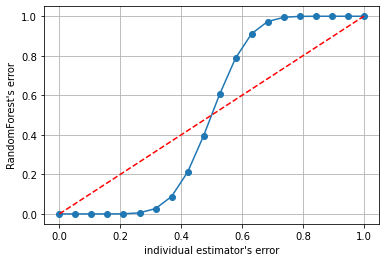

In [127]:
import numpy as np

x = np.linspace(0,1,20)

y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-")
plt.plot(x,x,"--",color="red")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.grid()
plt.show()

可以从图像上看出，当基分类器的误差率小于0.5，即准确率大于0.5时，集成的效果是比弱分类器要好的。相反，当基分类器的误差率大于0.5，袋装的集成算法就失效了。所以在使用随机森林之前，一定要检查，用来组成随机森林的分类树们是否都有至少50%的预测正确率。

对于第二个条件，我们在证明Bagging降低方差的数学过程中已经申明了很多次，唯有弱评估器之间相互独立、弱评估器输出的结果相互独立时，方差计算公式的前提假设才能被满足，Bagging才能享受降低方差的福利。

然而在现实中，森林中的弱评估器很难完全相互独立，因为所有弱评估器都是在相同的数据上进行训练的、因此构建出的树结构也大同小异。幸运的是，我们能够衡量弱评估器之间相关性。以随机森林回归为例，假设任意弱评估器之间的相关系数为$ρ$（读音Rho），则随机森林输出结果的方差等于：

<center>$$Var(\boldsymbol{\bar{X}}) = \frac{\sigma^2}{n} + \frac{n-1}{n}\rho\sigma^2$$</center><br>

这个公式是根据比奈梅定义(Bienaymé's Identity)与协方差相关的公式推导出来的，这暗示**随机森林输出结果的方差与森林中弱评估器之间的相关性是负相关的**，弱评估器之间的相关性越强，随机森林输出的结果的方差就越大，Bagging方法通过降低方差而获得的泛化能力就越小。因此在使用随机森林时，我们需要让弱评估器之间尽量相互独立，我们也可以通过这一点来提升随机森林的水平。

同样，因为Bagging是作用于方差的集成手段，所以Bagging方法擅长处理方差大、偏差低的模型，而不擅长处理方差小、偏差大的模型，这能够解释Bagging有效的剩下两个原因。

对于任意算法而言，方差与偏差往往不可兼得，这也很容易理解——想要在当前数据集上获得低偏差，必然意味着需要重点学习当前数据集上的规律，就不可避免地会忽略未知数据集上的规律，因此在不同数据集上进行测试时，模型结果的方差往往很大。

- **Q4：Bagging方法可以集成决策树之外的算法吗？**

强大又复杂的算法如决策树、支持向量机等，往往学习能力较强，倾向于表现为偏差低、方差高，这些算法就比较适合于Bagging。而线性回归、逻辑回归、KNN等复杂度较低的算法，学习能力较弱但表现稳定，因此倾向于表现为偏差高，方差低，就不太适合被用于Bagging。这也解答了另一个常见面试问题：Bagging除了能用于决策树，还能用于其他弱评估器吗？现在答案已经很清晰了。

在sklearn当中，我们可以使用以下类来轻松实现Bagging:

*class* `sklearn.ensemble.BaggingRegressor`(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

*class* `sklearn.ensemble.BaggingClassifier`(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

不难发现，这两个类的参数与随机森林大同小异，只不过因为弱分类器不再局限于树模型，因此不再具有对树模型进行剪枝的一系列参数。只要你对随机森林有深入的掌握，便可以轻松使用这两个类。需要注意的是，这两个类只能够接受sklearn中的评估器作为弱评估器。

- **Q5：怎样增强Bagging中弱评估器的独立性？**

正如之前所说，在实际使用数据进行训练时，我们很难让Bagging中的弱评估器完全相互独立，主要是因为：

- 训练的数据一致
- 弱评估器构建的规则一致

导致最终建立的弱评估器都大同小异，Bagging的效力无法完整发挥出来。为了弱评估器构建规则一致的问题，我们有了Averaging和Voting这样的模型融合方法：基本来看，就是使用Bagging的逻辑来融合数个不同算法的结果。而当我们不使用模型融合时，我们可以使用“随机性”来削弱弱分类器之间的联系、增强独立性、提升随机森林的效果。

在随机森林中，天生就存在有放回随机抽取样本建树的机制，因此才会有bootstrap、max_samples等参数，才会有袋外数据、袋外评估指标oob_score等属性，意在使用不同的数据建立弱评估器。除了有放回随机抽样之外，还可以使用max_features随机抽样特征进行分枝，加大弱评估器之间的区别。

正因为存在不同的随机的方式，Bagging集成方法下才有了多种不同的算法。

- **Q6：除了随机森林，你还知道其他Bagging算法吗？**

Bagging方法的原理简单，因此Bagging算法之间的不同主要体现在随机性的不同上。在上世纪90年代，对样本抽样的bagging、对特征抽样的bagging、对样本和特征都抽样的bagging都有不同的名字，不过今天，所有这些算法都被认为是装袋法或装袋法的延展。在sklearn当中，除了随机森林之外还提供另一个bagging算法：极端随机树。极端随机树是一种比随机森林更随机、对方差降低更多的算法，我们可以通过以下两个类来实现它：

*class* `sklearn.ensemble.ExtraTreesClassifier`(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

*class* `sklearn.ensemble.ExtraTreesRegressor`(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

与随机森林一样，极端随机树在建树时会随机挑选特征，但不同的是，随机森林会将随机挑选出的特征上**每个节点**都进行完整、精致的不纯度计算，然后挑选出最优节点，而极端随机树则会**随机选择数个节点**进行不纯度计算，然后选出这些节点中不纯度下降最多的节点。这样生长出的树比随机森林中的树更不容易过拟合，同时独立性更强，因此极端随机树可以更大程度地降低方差。

当然了，这种手段往往也会带来偏差的急剧下降，因此极端随机树是只适用于方差过大、非常不稳定的数据的。除非特殊情况，我们不会考虑使用极端随机树，但了解这个算法的存在也是一件好事。